1. Importe o banco de dados anexo nesta aula, que apresenta dados sobre salário em termos dos anos de experiência para cada indivíduo;

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.precision', 2)

In [2]:
df = pd.read_csv('Salary_Data.csv')

2. Mostre as 5 primeiras linhas;

In [3]:
df.head(5)

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


3. Mostre as colunas e o índice do dataset;

In [4]:
df.columns 

Index(['YearsExperience', 'Salary'], dtype='object')

In [5]:
df.index

RangeIndex(start=0, stop=30, step=1)

4. Mostre o shape do dataset e a quantidade de observações;

In [6]:
df.shape

(30, 2)

In [7]:
df.size

60

5. Mostre informações do objeto criado com a função info();

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


6. Mostre o dtype de cada coluna;

In [9]:
df.dtypes

YearsExperience    float64
Salary             float64
dtype: object

7. Verifique se há missing data no dataset;

In [10]:
df.isna().sum()

YearsExperience    0
Salary             0
dtype: int64

8. Mostre estatísticas descritivas do dataset com a função describe();

In [11]:
df.describe().round(2).T

,count,mean,std,min,25%,50%,75%,max
YearsExperience,30.0,5.31,2.84,1.1,3.20,4.7,7.70,10.5
Salary,30.0,76003.00,27414.43,37731.0,56720.75,65237.0,100544.75,122391.0


9. Calcule a matriz de correlação;

In [12]:
corr = df.corr()

In [13]:
corr

,YearsExperience,Salary
YearsExperience,1.00,0.98
Salary,0.98,1.00


Calcule a matriz de covariância;

In [14]:
cov = df.cov()

In [15]:
cov

,YearsExperience,Salary
YearsExperience,8.05,7.61e+04
Salary,76106.30,7.52e+08


11. Faça um mapa de calor com base na matriz de correlação, use o módulo Seaborn;

<AxesSubplot: >

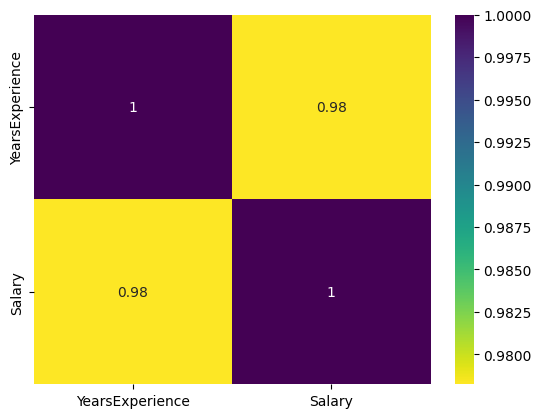

In [16]:
sns.heatmap(corr, annot = True,  cmap='viridis_r')

12. Faça um gráfico scatter plot entre as variáveis Salário e Anos de Experiência;

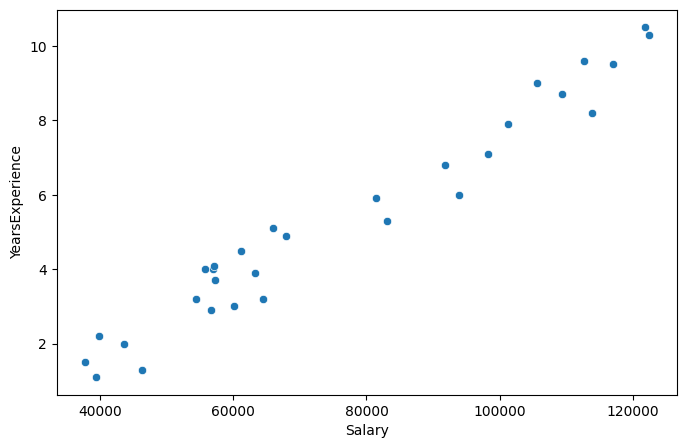

In [17]:
plt.figure(figsize = (8, 5))
sns.scatterplot(data = df, x = 'Salary', y = 'YearsExperience')
plt.show()

13. Gere um boxplot para cada variável do dataset;

<AxesSubplot: >

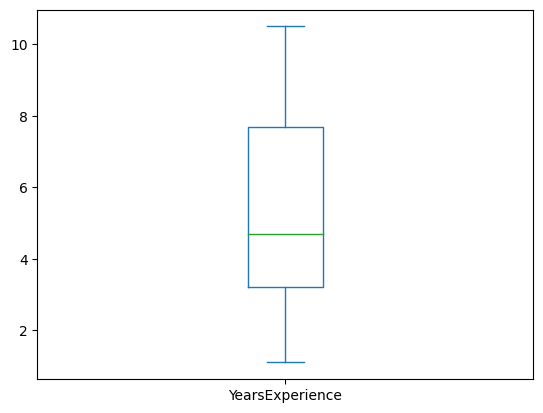

In [18]:
df['YearsExperience'].plot(kind = 'box')

<AxesSubplot: >

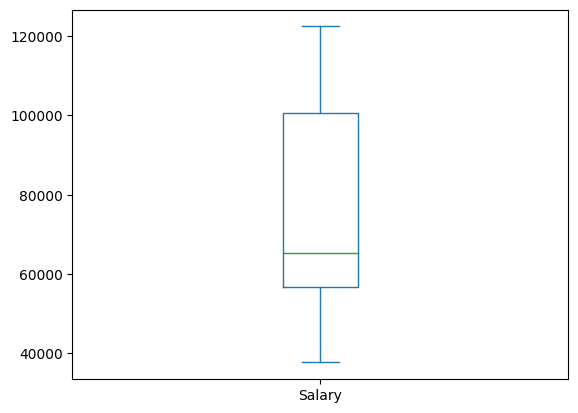

In [19]:
df['Salary'].plot(kind = 'box')

14. Defina a variável target (salário) e armazene em uma variável;

15. Defina variável preditora, que será utilizada para explicar o salário, e armazene em uma variável;

In [20]:
x = df['YearsExperience'].values.reshape(-1, 1)
y = df['Salary'].values.reshape(-1, 1)

Use a função train_test_split do sklearn para separar o dataset em dados de treino e teste, defina o test_size = 0.3 e random_state = 7;

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
X_treino, X_test, y_treino, y_test = train_test_split(x, y, test_size = 0.3, random_state= 7)

Verifique o shape dos vetores de treino e teste criados;

In [23]:
X_treino.shape

(21, 1)

In [24]:
X_test.shape

(9, 1)

Crie um modelo de regressão linear e ajuste aos dados de treino, use: from sklearn.linear_model import LinearRegression;

In [25]:
from sklearn.linear_model import LinearRegression

In [26]:
modelo = LinearRegression()
modelo.fit(X_treino, y_treino)

LinearRegression()

19. Calcule o coeficiente de determinação do modelo com a função score(), passando os dados de teste;

In [27]:
print(f'Coeficiente de determinação (R^2): {modelo.score(X_test, y_test)}')

Coeficiente de determinação (R^2): 0.958816457461513


20. Gere um gráfico mostrando o grau de ajustamento da reta aos dados de teste;

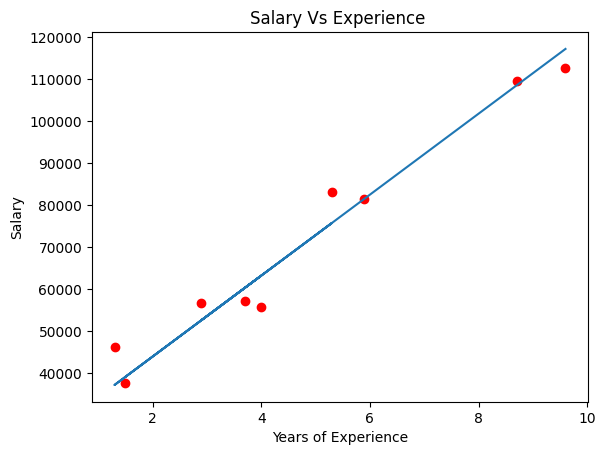

In [28]:
plt.scatter(X_test, y_test, c = 'red')
plt.plot(X_test, modelo.predict(X_test))
plt.title("Salary Vs Experience ")
plt.xlabel("Years of Experience")
plt.ylabel("Salary")
plt.show()

21. Estime o modelo utilizando o método OLS, para tanto use a biblioteca statsmodels; mostre o coeficiente de determinação do modelo;

In [29]:
import statsmodels.api as sm

In [31]:
Y = df['Salary']
X = df['YearsExperience']
X = sm.add_constant(X)
modelo_OLS = sm.OLS(Y, X)
resultados = modelo_OLS.fit()
resultados.params

const              25792.20
YearsExperience     9449.96
dtype: float64

In [32]:
resultados.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     622.5
Date:                Mon, 07 Nov 2022   Prob (F-statistic):           1.14e-20
Time:                        14:44:39   Log-Likelihood:                -301.44
No. Observations:                  30   AIC:                             606.9
Df Residuals:                      28   BIC:                             609.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            2.579e+04   2273.053     11.347      0.000    2.11e+04    3.04e+04
YearsExperience  9449.9623    378.755     24.950      0.000    8674.119    1.02e+04
==============================================================================
Omnibus:                        2.140   Durbin-Watson:                   1.648
Prob(Omnibus):                  0.343   Jarque-Bera (JB):                1.569
Skew:                           0.363   Prob(JB):                        0.456
Kurtosis:                       2.147   Cond. No.                         13.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

22. A partir do modelo OLS, gere um gráfico mostrando o grau de ajustamento da reta aos dados de teste.

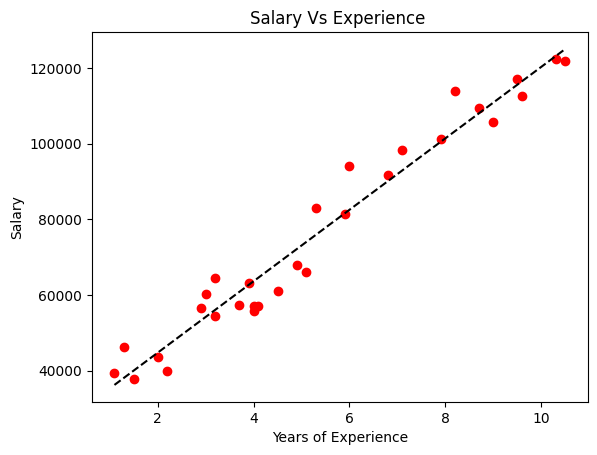

In [33]:
Y = [25792.20+9449.96*i for i in df['YearsExperience']]
plt.scatter(x = df['YearsExperience'], y = df['Salary'], c = 'r')
plt.plot(df['YearsExperience'], Y, color = 'k', ls = '--')
plt.title("Salary Vs Experience ")
plt.xlabel("Years of Experience")
plt.ylabel("Salary")
plt.show()